In [1]:
import pandas as pd
import numpy as np


In [2]:
pwd

'/Users/IainGraham/Desktop'

In [3]:
cd desktop

[Errno 2] No such file or directory: 'desktop'
/Users/IainGraham/Desktop


In [4]:
cd~

/Users/IainGraham


In [5]:
cd desktop

/Users/IainGraham/Desktop


In [6]:
trades=pd.read_parquet('bf_btceur_trades.parquet')

In [7]:
trades.head()

,price,amount,sell
date,,,
2018-02-02 02:00:08,7349.60000,0.004568,False
2018-02-02 02:00:09,7354.68045,0.010000,True
2018-02-02 02:00:09,7354.68045,0.004568,True
2018-02-02 02:00:10,7354.60000,0.102395,False
2018-02-02 02:00:26,7343.40750,0.086580,False


In [8]:
sma=trades.rolling(5).mean()

In [9]:
sma.head()

,price,amount,sell
date,,,
2018-02-02 02:00:08,NaN,NaN,NaN
2018-02-02 02:00:09,NaN,NaN,NaN
2018-02-02 02:00:09,NaN,NaN,NaN
2018-02-02 02:00:10,NaN,NaN,NaN
2018-02-02 02:00:26,7351.39368,0.041622,0.4


In [10]:
nosell=trades[trades['sell']!=True]

In [11]:
nosell.head()

,price,amount,sell
date,,,
2018-02-02 02:00:08,7349.60000,0.004568,False
2018-02-02 02:00:10,7354.60000,0.102395,False
2018-02-02 02:00:26,7343.40750,0.086580,False
2018-02-02 02:00:26,7343.80725,0.204920,False
2018-02-02 02:00:38,7356.00000,0.300000,False


In [12]:
sellers=trades[trades['sell']!=False]

In [13]:
sellers.head()

,price,amount,sell
date,,,
2018-02-02 02:00:09,7354.68045,0.010000,True
2018-02-02 02:00:09,7354.68045,0.004568,True
2018-02-02 02:01:15,7352.28195,0.002000,True
2018-02-02 02:01:55,7351.32020,0.300000,True
2018-02-02 02:01:55,7351.32020,0.300000,True


In [14]:
np.average(sellers['price'])

6948.584873760393

In [15]:
np.average(nosell['price'])

6940.754617531432

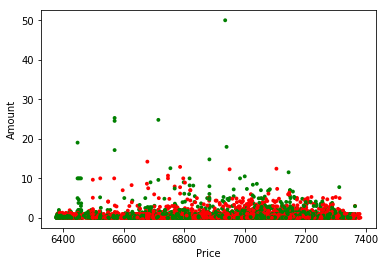

In [40]:
import matplotlib.pyplot as plt

x = trades['price']
y = trades['amount']
w = trades['sell']

plt.xlabel('Price')
plt.ylabel('Amount')

col = np.where(w!=True, 'red',np.where(w!=False, 'green','r'))

plt.scatter(x, y, c=col, s=15, linewidth=0)
plt.show()

In [18]:
tenmax = trades.resample('10T').max()

In [19]:
tenmax.head()

,price,amount,sell
date,,,
2018-02-02 02:00:00,7361.9,1.000000,True
2018-02-02 02:10:00,7253.0,1.000000,True
2018-02-02 02:20:00,7251.0,11.534204,True
2018-02-02 02:30:00,7213.0,5.531754,True
2018-02-02 02:40:00,7207.0,1.905110,True


In [20]:
tenmin = trades.resample('10T').min()

In [21]:
tenmin.head()

,price,amount,sell
date,,,
2018-02-02 02:00:00,7249.000000,0.002000,False
2018-02-02 02:10:00,7204.000000,0.002004,False
2018-02-02 02:20:00,7144.753100,0.000540,False
2018-02-02 02:30:00,7149.285678,0.002857,False
2018-02-02 02:40:00,7149.205718,0.002000,False


In [22]:
tenmax.reset_index(inplace=True)

In [23]:
tenmax.head()

,date,price,amount,sell
0,2018-02-02 02:00:00,7361.9,1.000000,True
1,2018-02-02 02:10:00,7253.0,1.000000,True
2,2018-02-02 02:20:00,7251.0,11.534204,True
3,2018-02-02 02:30:00,7213.0,5.531754,True
4,2018-02-02 02:40:00,7207.0,1.905110,True


In [24]:
import pandas as pd
tenmax['date'] = pd.to_datetime(tenmax['date'], unit='s')

Text(0.5,1,'Maximum Price Plotted Every 10 Minutes')

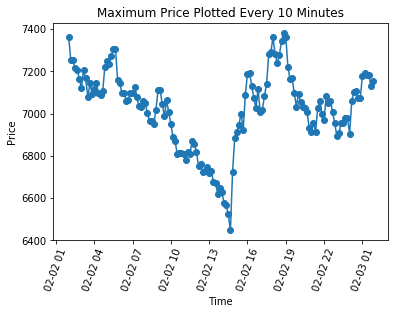

In [76]:
plt.plot_date(x=tenmax['date'], y=tenmax['price'], ls='solid')
plt.ylabel('Price')
plt.xlabel('Time')

plt.xticks(rotation=70)

plt.title('Maximum Price Plotted Every 10 Minutes')

In [26]:
tenmin.reset_index(inplace=True)

In [27]:
tenmin.head()

,date,price,amount,sell
0,2018-02-02 02:00:00,7249.000000,0.002000,False
1,2018-02-02 02:10:00,7204.000000,0.002004,False
2,2018-02-02 02:20:00,7144.753100,0.000540,False
3,2018-02-02 02:30:00,7149.285678,0.002857,False
4,2018-02-02 02:40:00,7149.205718,0.002000,False


In [42]:
min10 = tenmin['price']

In [28]:
import pandas as pd
tenmin['date'] = pd.to_datetime(tenmin['date'], unit='s')

Text(0.5,1,'Minimum Price Plotted Every 10 Minutes')

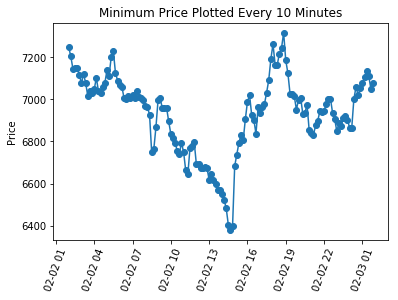

In [77]:
plt.plot_date(x=tenmin['date'], y=tenmin['price'], ls='solid')
plt.ylabel('Price')

plt.xticks(rotation=70)

plt.title('Minimum Price Plotted Every 10 Minutes')

In [30]:
trades.reset_index(inplace=True)

In [31]:
trades.head()

,date,price,amount,sell
0,2018-02-02 02:00:08,7349.60000,0.004568,False
1,2018-02-02 02:00:09,7354.68045,0.010000,True
2,2018-02-02 02:00:09,7354.68045,0.004568,True
3,2018-02-02 02:00:10,7354.60000,0.102395,False
4,2018-02-02 02:00:26,7343.40750,0.086580,False


In [32]:
import pandas as pd
trades['date'] = pd.to_datetime(trades['date'], unit='s')

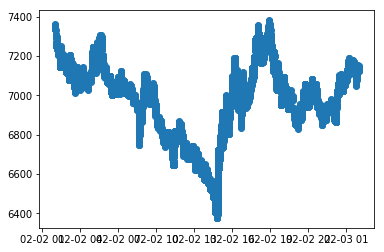

In [33]:
plt.plot_date(x=trades['date'], y=trades['price'])

In [34]:
trades.describe()

,price,amount
count,15715.000000,15715.000000
mean,6944.705870,0.363908
std,220.682866,0.954616
min,6377.000000,0.000001
25%,6787.580973,0.027552
50%,6985.000000,0.100000
75%,7098.904860,0.400000
max,7381.800000,50.000000
